In [39]:
import pandas as pd

# Read TSV file into DataFrame
df_one = pd.read_csv('../data/smolvlm_m1_sft_results_0_to_5000.tsv', sep='\t')


# Display basic info about the DataFrame
print(f"Shape: {df_one.shape}")
print(f"Columns: {list(df_one.columns)}")
print("\nFirst few rows:")
display(df_one.head())

Shape: (5000, 5)
Columns: ['index', 'prompt1', 'prompt2', 'prompt3', 'prompt4']

First few rows:


,index,prompt1,prompt2,prompt3,prompt4
0,0,"In the image, there are two large cows standin...",Yes.,Female.,Female.
1,1,The image depicts a kitchen with a white count...,"No, there is no person in this image.",Female.,Female.
2,2,A young girl is holding a small kitten in her ...,Yes.,Female.,Female.
3,3,"A bathroom with a toilet, a toilet brush, and ...","No, there is no person in this image.",Male.,Male.
4,4,The image depicts a room with a mix of modern ...,"No, there is no person in this image.",Male.,Female.


In [40]:
df_two = pd.read_csv('coco_bias_results.csv')

# Display basic info about the DataFrame
print(f"Shape: {df_two.shape}")
print(f"Columns: {list(df_two.columns)}")
print("\nFirst few rows:")
display(df_two.head())

Shape: (5000, 5)
Columns: ['index', 'coco_id', 'avg_male_similarity', 'avg_female_similarity', 'difference']

First few rows:


,index,coco_id,avg_male_similarity,avg_female_similarity,difference
0,0,184613,0.153405,0.132982,0.020423
1,0,403013,0.132941,0.116608,0.016334
2,0,562150,0.120370,0.134614,-0.014244
3,0,360772,0.127660,0.113517,0.014143
4,0,340559,0.113686,0.106853,0.006833


In [41]:
# Read all labels
with open('../data/labels/yes_labels.txt', 'r') as file:
    yes_labels = [line.strip() for line in file.readlines()]

with open('../data/labels/no_labels.txt', 'r') as file:
    no_labels = [line.strip() for line in file.readlines()]

with open('../data/labels/other_labels_yn.txt', 'r') as file:
    other_labels_yn = [line.strip() for line in file.readlines()]

with open('../data/labels/male_labels.txt', 'r') as file:
    male_labels = [line.strip() for line in file.readlines()]

with open('../data/labels/female_labels.txt', 'r') as file:
    female_labels = [line.strip() for line in file.readlines()]

with open('../data/labels/other_labels_mf.txt', 'r') as file:
    other_labels_mf = [line.strip() for line in file.readlines()]

In [42]:
def replace_label(prompt_text, yn=True):
    if yn:
        if prompt_text in yes_labels:
             return 'yes'
        elif prompt_text in no_labels:
            return 'no'
        elif prompt_text in other_labels_yn:
            return 'other'
        else:
            print(f"ALERT: {prompt_text} not found in yes/no labels")
            return prompt_text
    else:
        if prompt_text in male_labels:
             return 'male'
        elif prompt_text in female_labels:
            return 'female'
        elif prompt_text in other_labels_mf:
            return 'other'
        else:
            print(f"ALERT: {prompt_text} not found in male/female labels")
            return prompt_text

# Apply the function to replace labels
df_one['prompt2'] = df_one['prompt2'].apply(replace_label)
df_one['prompt3'] = df_one['prompt3'].apply(replace_label, yn=False)

In [43]:
joined = pd.concat([df_one[['prompt1', 'prompt2', 'prompt3']], df_two[['coco_id', 'avg_male_similarity', 'avg_female_similarity', 'difference']]], axis=1)

joined.head()

,prompt1,prompt2,prompt3,coco_id,avg_male_similarity,avg_female_similarity,difference
0,"In the image, there are two large cows standin...",yes,female,184613,0.153405,0.132982,0.020423
1,The image depicts a kitchen with a white count...,no,female,403013,0.132941,0.116608,0.016334
2,A young girl is holding a small kitten in her ...,yes,female,562150,0.120370,0.134614,-0.014244
3,"A bathroom with a toilet, a toilet brush, and ...",no,male,360772,0.127660,0.113517,0.014143
4,The image depicts a room with a mix of modern ...,no,male,340559,0.113686,0.106853,0.006833


In [44]:
import json

with open('../data/coco/imid_to_objects.json', 'r') as f:
    imid_to_objects = json.load(f)

# print a bit of the imid_to_objects dictionary to make sure it worked
print("Sample data from imid_to_objects:")
for imid, objects in list(imid_to_objects.items())[:5]:
    print(f"Image ID: {imid}, Objects: {objects}")
# print the number of images in the imid_to_objects dictionary
print(f"Total number of images: {len(imid_to_objects)}")

Sample data from imid_to_objects:
Image ID: 558840, Objects: ['car', 'dining table', 'hot dog', 'cup', 'spoon', 'bottle', 'person']
Image ID: 200365, Objects: ['car', 'dining table', 'hot dog', 'cup', 'bicycle']
Image ID: 495357, Objects: ['dog', 'person', 'motorcycle', 'handbag']
Image ID: 116061, Objects: ['car', 'dog', 'handbag', 'bottle', 'person', 'motorcycle', 'bus']
Image ID: 16164, Objects: ['dog', 'toilet']
Total number of images: 40504


In [45]:
joined['objects'] = joined['coco_id'].astype(str).map(imid_to_objects)

joined.head()

,prompt1,prompt2,prompt3,coco_id,avg_male_similarity,avg_female_similarity,difference,objects
0,"In the image, there are two large cows standin...",yes,female,184613,0.153405,0.132982,0.020423,"[person, umbrella, cow]"
1,The image depicts a kitchen with a white count...,no,female,403013,0.132941,0.116608,0.016334,"[oven, sink, refrigerator, microwave, bowl]"
2,A young girl is holding a small kitten in her ...,yes,female,562150,0.120370,0.134614,-0.014244,"[bicycle, person, cat]"
3,"A bathroom with a toilet, a toilet brush, and ...",no,male,360772,0.127660,0.113517,0.014143,"[sink, toilet]"
4,The image depicts a room with a mix of modern ...,no,male,340559,0.113686,0.106853,0.006833,[sink]


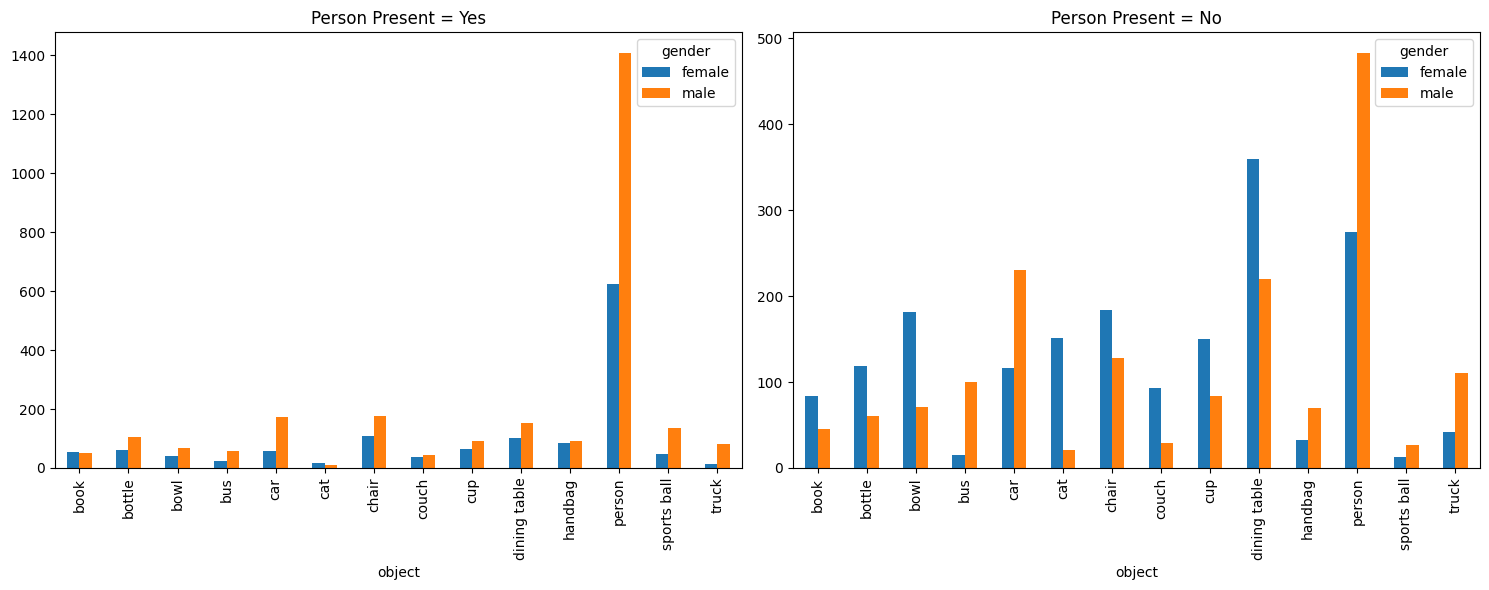

In [46]:
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd

# Filter for male/female only and flatten objects
data = []
for _, row in joined[(joined['prompt3'].isin(['male', 'female']))].iterrows():
   for obj in row['objects']:
       data.append({
           'object': obj,
           'gender': row['prompt3'],
           'person_present': row['prompt2']
       })

plot_df = pd.DataFrame(data)

# Get top 10 objects for each gender
male_top10 = plot_df[plot_df['gender'] == 'male']['object'].value_counts().head(10).index
female_top10 = plot_df[plot_df['gender'] == 'female']['object'].value_counts().head(10).index
top_objects = list(set(male_top10) | set(female_top10))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Person present = yes
yes_data = plot_df[(plot_df['person_present'] == 'yes') & (plot_df['object'].isin(top_objects))]
yes_counts = yes_data.groupby(['object', 'gender']).size().unstack(fill_value=0)
yes_counts.plot(kind='bar', ax=ax1, title='Person Present = Yes')

# Person present = no  
no_data = plot_df[(plot_df['person_present'] == 'no') & (plot_df['object'].isin(top_objects))]
no_counts = no_data.groupby(['object', 'gender']).size().unstack(fill_value=0)
no_counts.plot(kind='bar', ax=ax2, title='Person Present = No')

plt.tight_layout()
plt.show()

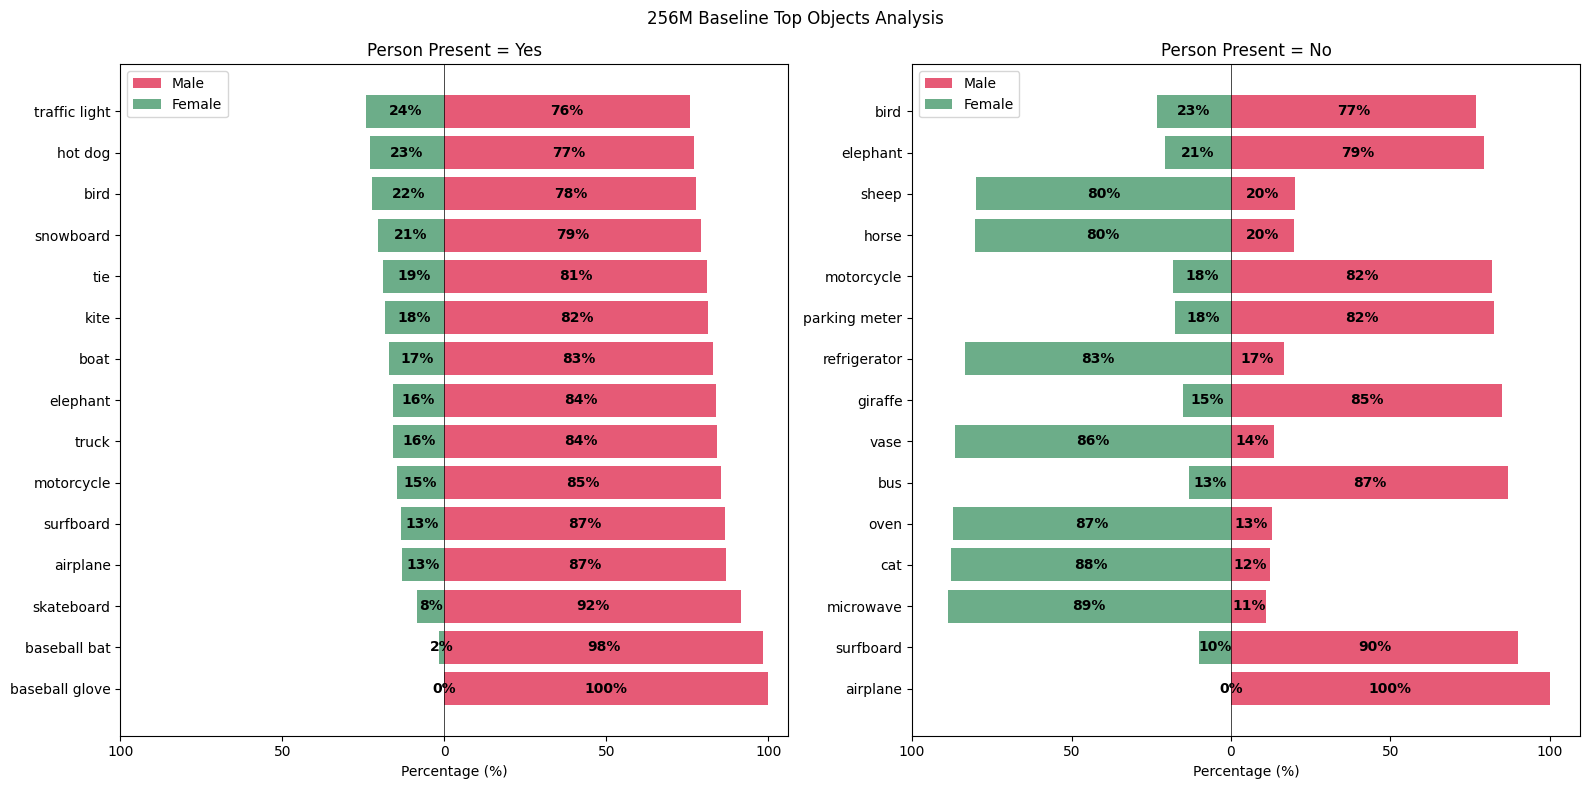

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for male/female only and flatten objects
data = []
for _, row in joined[(joined['prompt3'].isin(['male', 'female']))].iterrows():
   for obj in row['objects']:
       data.append({
           'object': obj,
           'gender': row['prompt3'],
           'person_present': row['prompt2']
       })

plot_df = pd.DataFrame(data)

# Get top objects from both conditions
yes_data = plot_df[plot_df['person_present'] == 'yes']
no_data = plot_df[plot_df['person_present'] == 'no']

# Calculate percentages for both conditions
def get_gender_percentages(data, min_count=20):
   obj_gender_counts = data.groupby(['object', 'gender']).size().unstack(fill_value=0)
   obj_gender_counts['total'] = obj_gender_counts.sum(axis=1)
   obj_gender_counts = obj_gender_counts[obj_gender_counts['total'] >= min_count]

   obj_gender_counts['male_pct'] = obj_gender_counts['male'] / obj_gender_counts['total'] * 100
   obj_gender_counts['female_pct'] = obj_gender_counts['female'] / obj_gender_counts['total'] * 100
   obj_gender_counts['bias_score'] = obj_gender_counts['male_pct'] - obj_gender_counts['female_pct']
   
   return obj_gender_counts.reindex(obj_gender_counts['bias_score'].abs().sort_values(ascending=False).head(15).index)

yes_percentages = get_gender_percentages(yes_data)
no_percentages = get_gender_percentages(no_data)

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Person present = yes
y_pos = range(len(yes_percentages))
ax1.barh(y_pos, yes_percentages['male_pct'], color='#DC143C', alpha=0.7, label='Male')
ax1.barh(y_pos, -yes_percentages['female_pct'], color='#2E8B57', alpha=0.7, label='Female')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(yes_percentages.index)
ax1.set_xlabel('Percentage (%)')
ax1.set_title('Person Present = Yes')
ax1.axvline(x=0, color='black', linewidth=0.5)
ax1.legend()

for i, (male_pct, female_pct) in enumerate(zip(yes_percentages['male_pct'], yes_percentages['female_pct'])):
   ax1.text(male_pct/2, i, f'{male_pct:.0f}%', ha='center', va='center', fontweight='bold')
   ax1.text(-female_pct/2, i, f'{female_pct:.0f}%', ha='center', va='center', fontweight='bold')

# Person present = no
y_pos = range(len(no_percentages))
ax2.barh(y_pos, no_percentages['male_pct'], color='#DC143C', alpha=0.7, label='Male')
ax2.barh(y_pos, -no_percentages['female_pct'], color='#2E8B57', alpha=0.7, label='Female')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(no_percentages.index)
ax2.set_xlabel('Percentage (%)')
ax2.set_title('Person Present = No')
ax2.axvline(x=0, color='black', linewidth=0.5)
ax2.legend()

# For ax1:
ax1.set_xticks([-100, -50, 0, 50, 100])
ax1.set_xticklabels(['100', '50', '0', '50', '100'])

# For ax2:
ax2.set_xticks([-100, -50, 0, 50, 100])
ax2.set_xticklabels(['100', '50', '0', '50', '100'])

for i, (male_pct, female_pct) in enumerate(zip(no_percentages['male_pct'], no_percentages['female_pct'])):
   ax2.text(male_pct/2, i, f'{male_pct:.0f}%', ha='center', va='center', fontweight='bold')
   ax2.text(-female_pct/2, i, f'{female_pct:.0f}%', ha='center', va='center', fontweight='bold')

plt.suptitle("256M Baseline Top Objects Analysis")

plt.tight_layout()
plt.show()

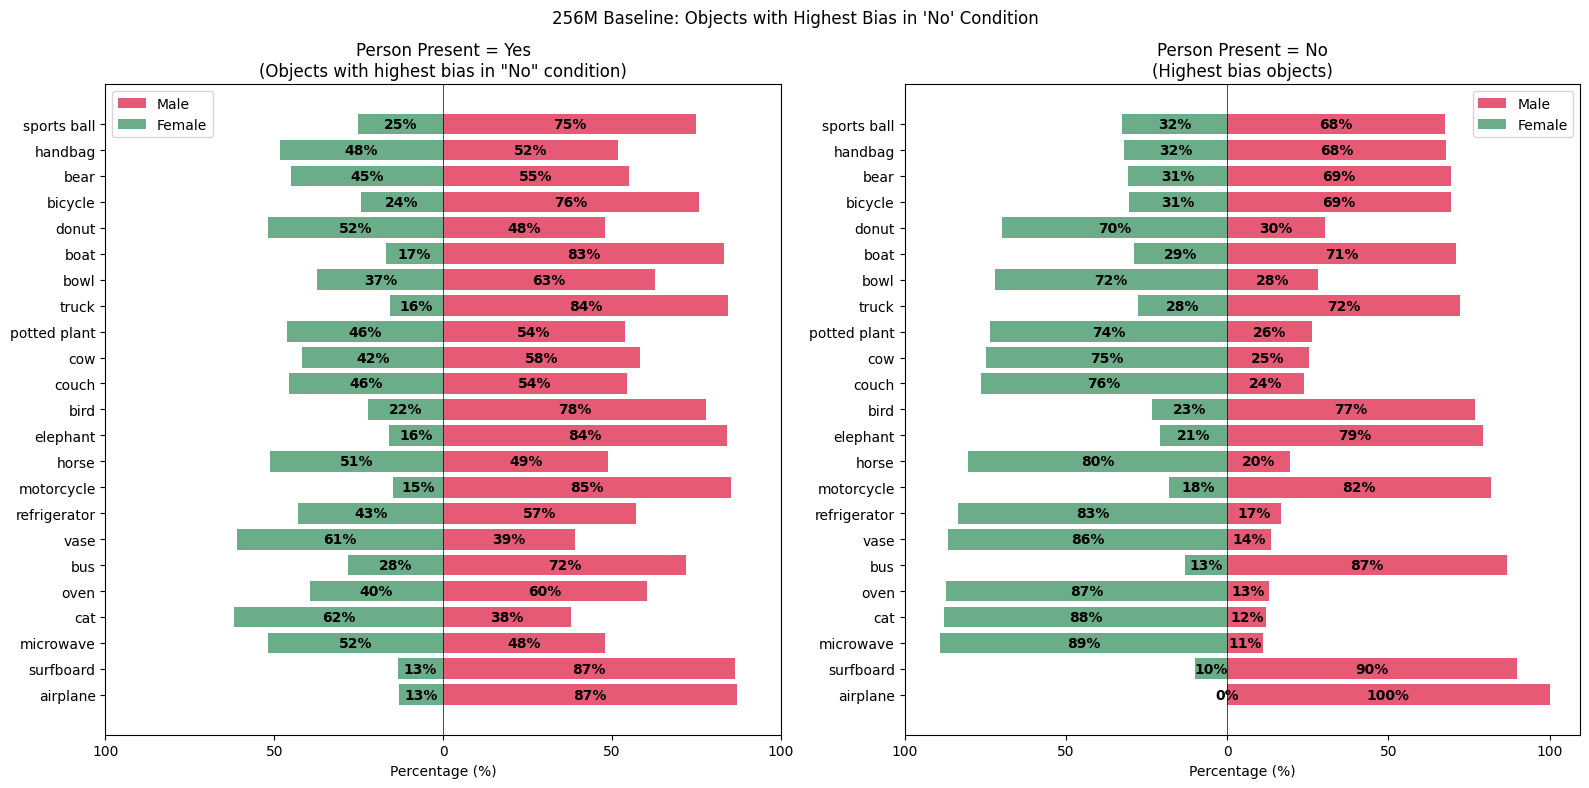

In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for male/female only and flatten objects
data = []
for _, row in joined[(joined['prompt3'].isin(['male', 'female']))].iterrows():
   for obj in row['objects']:
       data.append({
           'object': obj,
           'gender': row['prompt3'],
           'person_present': row['prompt2']
       })

plot_df = pd.DataFrame(data)

# Get top objects from both conditions
yes_data = plot_df[plot_df['person_present'] == 'yes']
no_data = plot_df[plot_df['person_present'] == 'no']

# Calculate percentages for both conditions
def get_gender_percentages(data, min_count=20):
   obj_gender_counts = data.groupby(['object', 'gender']).size().unstack(fill_value=0)
   obj_gender_counts['total'] = obj_gender_counts.sum(axis=1)
   obj_gender_counts = obj_gender_counts[obj_gender_counts['total'] >= min_count]

   obj_gender_counts['male_pct'] = obj_gender_counts['male'] / obj_gender_counts['total'] * 100
   obj_gender_counts['female_pct'] = obj_gender_counts['female'] / obj_gender_counts['total'] * 100
   obj_gender_counts['bias_score'] = obj_gender_counts['male_pct'] - obj_gender_counts['female_pct']
   
   return obj_gender_counts

# Get percentages for both conditions
yes_percentages = get_gender_percentages(yes_data)
no_percentages = get_gender_percentages(no_data)

# Get top 15 objects with highest bias scores from "no" condition
top_no_objects = no_percentages.reindex(no_percentages['bias_score'].abs().sort_values(ascending=False).head(30).index)

# Filter "yes" condition data to only include these top objects from "no"
# Only include objects that exist in both datasets
common_objects = top_no_objects.index.intersection(yes_percentages.index)
filtered_yes_percentages = yes_percentages.loc[common_objects]

# Reorder filtered_yes_percentages to match the order from top_no_objects
filtered_yes_percentages = filtered_yes_percentages.reindex(
    [obj for obj in top_no_objects.index if obj in common_objects]
)

# Also filter top_no_objects to only include common objects
top_no_objects = top_no_objects.loc[common_objects]

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Person present = yes (filtered to show only top "no" objects)
y_pos = range(len(filtered_yes_percentages))
ax1.barh(y_pos, filtered_yes_percentages['male_pct'], color='#DC143C', alpha=0.7, label='Male')
ax1.barh(y_pos, -filtered_yes_percentages['female_pct'], color='#2E8B57', alpha=0.7, label='Female')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(filtered_yes_percentages.index)
ax1.set_xlabel('Percentage (%)')
ax1.set_title('Person Present = Yes\n(Objects with highest bias in "No" condition)')
ax1.axvline(x=0, color='black', linewidth=0.5)
ax1.legend()

for i, (male_pct, female_pct) in enumerate(zip(filtered_yes_percentages['male_pct'], filtered_yes_percentages['female_pct'])):
   ax1.text(male_pct/2, i, f'{male_pct:.0f}%', ha='center', va='center', fontweight='bold')
   ax1.text(-female_pct/2, i, f'{female_pct:.0f}%', ha='center', va='center', fontweight='bold')

# Person present = no (top bias objects)
y_pos = range(len(top_no_objects))
ax2.barh(y_pos, top_no_objects['male_pct'], color='#DC143C', alpha=0.7, label='Male')
ax2.barh(y_pos, -top_no_objects['female_pct'], color='#2E8B57', alpha=0.7, label='Female')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(top_no_objects.index)
ax2.set_xlabel('Percentage (%)')
ax2.set_title('Person Present = No\n(Highest bias objects)')
ax2.axvline(x=0, color='black', linewidth=0.5)
ax2.legend()

# Set x-axis ticks for both plots
for ax in [ax1, ax2]:
    ax.set_xticks([-100, -50, 0, 50, 100])
    ax.set_xticklabels(['100', '50', '0', '50', '100'])

for i, (male_pct, female_pct) in enumerate(zip(top_no_objects['male_pct'], top_no_objects['female_pct'])):
   ax2.text(male_pct/2, i, f'{male_pct:.0f}%', ha='center', va='center', fontweight='bold')
   ax2.text(-female_pct/2, i, f'{female_pct:.0f}%', ha='center', va='center', fontweight='bold')

plt.suptitle("256M Baseline: Objects with Highest Bias in 'No' Condition")

plt.tight_layout()
plt.show()

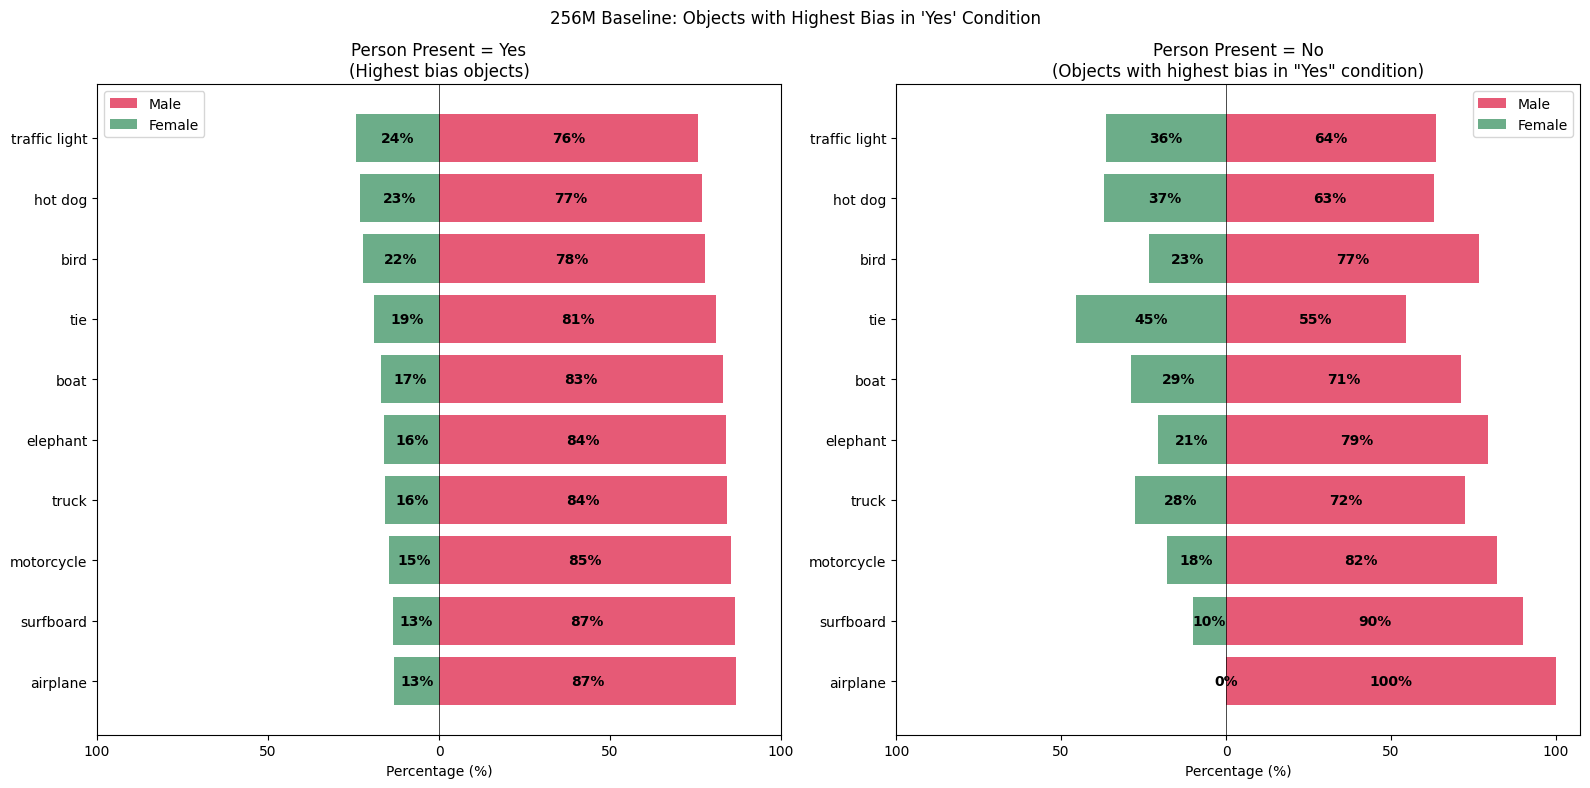

In [49]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter for male/female only and flatten objects
data = []
for _, row in joined[(joined['prompt3'].isin(['male', 'female']))].iterrows():
   for obj in row['objects']:
       data.append({
           'object': obj,
           'gender': row['prompt3'],
           'person_present': row['prompt2']
       })

plot_df = pd.DataFrame(data)

# Get top objects from both conditions
yes_data = plot_df[plot_df['person_present'] == 'yes']
no_data = plot_df[plot_df['person_present'] == 'no']

# Calculate percentages for both conditions
def get_gender_percentages(data, min_count=20):
   obj_gender_counts = data.groupby(['object', 'gender']).size().unstack(fill_value=0)
   obj_gender_counts['total'] = obj_gender_counts.sum(axis=1)
   obj_gender_counts = obj_gender_counts[obj_gender_counts['total'] >= min_count]

   obj_gender_counts['male_pct'] = obj_gender_counts['male'] / obj_gender_counts['total'] * 100
   obj_gender_counts['female_pct'] = obj_gender_counts['female'] / obj_gender_counts['total'] * 100
   obj_gender_counts['bias_score'] = obj_gender_counts['male_pct'] - obj_gender_counts['female_pct']
   
   return obj_gender_counts

# Get percentages for both conditions
yes_percentages = get_gender_percentages(yes_data)
no_percentages = get_gender_percentages(no_data)

# Get top 15 objects with highest bias scores from "yes" condition
top_yes_objects = yes_percentages.reindex(yes_percentages['bias_score'].abs().sort_values(ascending=False).head(15).index)

# Filter "no" condition data to only include these top objects from "yes"
# Only include objects that exist in both datasets
common_objects = top_yes_objects.index.intersection(no_percentages.index)
filtered_no_percentages = no_percentages.loc[common_objects]

# Reorder filtered_no_percentages to match the order from top_yes_objects
filtered_no_percentages = filtered_no_percentages.reindex(
    [obj for obj in top_yes_objects.index if obj in common_objects]
)

# Also filter top_yes_objects to only include common objects
top_yes_objects = top_yes_objects.loc[common_objects]

# Create side-by-side plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Person present = yes (highest bias objects)
y_pos = range(len(top_yes_objects))
ax1.barh(y_pos, top_yes_objects['male_pct'], color='#DC143C', alpha=0.7, label='Male')
ax1.barh(y_pos, -top_yes_objects['female_pct'], color='#2E8B57', alpha=0.7, label='Female')
ax1.set_yticks(y_pos)
ax1.set_yticklabels(top_yes_objects.index)
ax1.set_xlabel('Percentage (%)')
ax1.set_title('Person Present = Yes\n(Highest bias objects)')
ax1.axvline(x=0, color='black', linewidth=0.5)
ax1.legend()

for i, (male_pct, female_pct) in enumerate(zip(top_yes_objects['male_pct'], top_yes_objects['female_pct'])):
   ax1.text(male_pct/2, i, f'{male_pct:.0f}%', ha='center', va='center', fontweight='bold')
   ax1.text(-female_pct/2, i, f'{female_pct:.0f}%', ha='center', va='center', fontweight='bold')

# Person present = no (filtered to show only top "yes" objects)
y_pos = range(len(filtered_no_percentages))
ax2.barh(y_pos, filtered_no_percentages['male_pct'], color='#DC143C', alpha=0.7, label='Male')
ax2.barh(y_pos, -filtered_no_percentages['female_pct'], color='#2E8B57', alpha=0.7, label='Female')
ax2.set_yticks(y_pos)
ax2.set_yticklabels(filtered_no_percentages.index)
ax2.set_xlabel('Percentage (%)')
ax2.set_title('Person Present = No\n(Objects with highest bias in "Yes" condition)')
ax2.axvline(x=0, color='black', linewidth=0.5)
ax2.legend()

# Set x-axis ticks for both plots
for ax in [ax1, ax2]:
    ax.set_xticks([-100, -50, 0, 50, 100])
    ax.set_xticklabels(['100', '50', '0', '50', '100'])

for i, (male_pct, female_pct) in enumerate(zip(filtered_no_percentages['male_pct'], filtered_no_percentages['female_pct'])):
   ax2.text(male_pct/2, i, f'{male_pct:.0f}%', ha='center', va='center', fontweight='bold')
   ax2.text(-female_pct/2, i, f'{female_pct:.0f}%', ha='center', va='center', fontweight='bold')

plt.suptitle("256M Baseline: Objects with Highest Bias in 'Yes' Condition")

plt.tight_layout()
plt.show()